### ***Modeling***

In this step, we aim to identify a classification model that reliably detects malignant tumors while minimizing false negatives, the most critical error in a medical context. A false negative implies a missed cancer diagnosis, which can delay treatment and increase risk. Therefore, our priority is not just overall accuracy, but high recall for malignant cases.

We begin with logistic regression as a baseline due to its simplicity and interpretability. We then explore more flexible models such as a neural network (MLP) and a Random Forest to assess whether they offer performance gains, particularly in sensitivity. Each model is evaluated using the same metrics: accuracy, precision, recall, and confusion matrix. A model will be retained only if it improves recall without introducing unacceptable trade-offs in precision or interpretability.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pandas / numpy: for data manipulation

train_test_split: to split the data into training and testing sets

LogisticRegression: the base model

metrics: to evaluate the model's performance

In [2]:
#Reading the CSV file
data = pd.read_csv("clean_data.csv")
print(data.head())

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [4]:
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [5]:
#Data Preparation
X = data.drop(columns=["diagnosis"])  # independents Variables 
y = data["diagnosis"]                       # target Variable

X contains the features (measurements of the cancer cells).

y contains the target variable to predict:

0 → benign

1 → malignant

In [6]:
#Splitting the data into train and test sets

#80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Creating pipeline with scaling + logistic regression
pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

# Training the pipeline
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

Logistic regression calculates the probability that a tumor is malignant.

Setting max_iter=1000 prevents convergence errors.

In [8]:
# Prediction

# Set test prediction
y_pred = pipeline.predict(X_test)

In [9]:
# Model evaluation

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", round(accuracy, 4))
print("\nConfusion matrix :\n", conf_matrix)
print("\nClassification report :\n", report)

Accuracy : 0.9737

Confusion matrix :
 [[70  1]
 [ 2 41]]

Classification report :
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



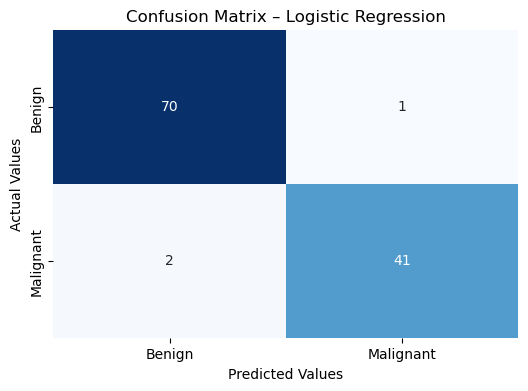

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custo labels
labels = ['Benign', 'Malignant']

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix – Logistic Regression")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

Accuracy: percentage of correct predictions

Confusion matrix: shows true positives/negatives and errors

Classification report: includes precision, recall, and F1-score

**Interpretation**
The model reached an accuracy of 97.37%, which means it correctly classified 111 out of 114 tumors. Looking at the confusion matrix, we see that 70 benign tumors were correctly identified, and 41 malignant tumors were also correctly identified. There was one benign tumor that was incorrectly flagged as malignant, and two malignant tumors that were missed.

This is a strong result overall. The model shows high precision and recall for both classes, and the number of false negatives is low. 

**Confusion Matrix Analysis**

70 true negatives (TN) → 70 benign tumors correctly predicted.

41 true positives (TP) → 41 malignant tumors correctly predicted.

1 false positive (FP) → 1 benign tumor incorrectly classified as malignant.

2 false negatives (FN) → 2 malignant tumors incorrectly classified as benign.

In summary:
The model missed 2 malignant cases out of 43, which is important to monitor in a medical context. These are the most critical errors, as they could delay diagnosis and treatment.

**Overall Averages**

Accuracy: 0.9737

Macro average: 0.97

Weighted average: 0.97

These results show strong overall performance, with good balance between sensitivity and precision across both classes.

**Business / Medical Interpretation**
The model is reliable for preliminary detection of benign and malignant tumors. 

That said, in a medical context, even a small number of missed malignant cases is important to monitor. These errors could delay diagnosis, so the model should be used as a support tool, not a final decision-maker.

Although logistic regression has shown excellent results with an accuracy of 97.37%, this model remains relatively simple and linear. However, the relationships between cancer cell features and tumor type can be nonlinear and more complex to model.

To further enhance the analysis and improve the model's ability to capture these complex relationships, we have chosen to explore a more advanced approach: artificial neural networks. This type of model, inspired by the functioning of the human brain, can handle multiple interactions between variables and often achieves superior performance on classification problems.

The next section therefore presents the construction, training, and evaluation of a neural network applied to our problem of predicting benign or malignant tumors.

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.neural_network import MLPClassifier

pandas, numpy: for data manipulation

matplotlib, seaborn: for visualizations

train_test_split: to split the dataset into training and testing sets

StandardScaler: data normalization (very important for neural networks)

MLPClassifier: Scikit-learn’s neural network model

roc_curve, auc: to compute the overall model performance

In [12]:
## Loading the data
data = pd.read_csv("clean_data.csv")

In [13]:
## Splitting the explanatory variables (X) and the target variable (y)
X = data.drop(columns=['diagnosis']) 
y = data['diagnosis']

In [14]:
# Splitting the dataset into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
# Data normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

To build the neural network, we chose a multilayer perceptron with two hidden layers containing 64 and 32 neurons. This structure gives the model enough flexibility to learn complex patterns without being overly deep or slow to train. We used the ReLU activation function, which is standard for most modern networks because it helps with convergence and avoids vanishing gradients. For optimization, we selected the Adam solver, which adapts the learning rate during training and generally performs well across a wide range of problems. We also set the maximum number of iterations to 500 to give the model enough time to converge, and fixed the random state to ensure reproducibility. These choices reflect a balance between performance, training stability, and practical runtime.

In [16]:
# Model Creation
mlp_model = MLPClassifier(
    hidden_layer_sizes=(64, 32),  
    activation='relu',            
    solver='adam',                
    max_iter=500,                
    random_state=42
)

# Training
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42)

In [17]:
# Model evaluation

# Prediction
y_pred = mlp_model.predict(X_test)

# Prediction of the probability 
y_pred_proba = mlp_model.predict_proba(X_test)[:, 1]

# evaluation
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy :", round(acc, 4))
print("\nConfusion matrix :\n", conf_matrix)
print("\nClassification report :\n", report)

Accuracy : 0.9649

Confusion matrix :
 [[72  0]
 [ 4 38]]

Classification report :
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        72
           1       1.00      0.90      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114



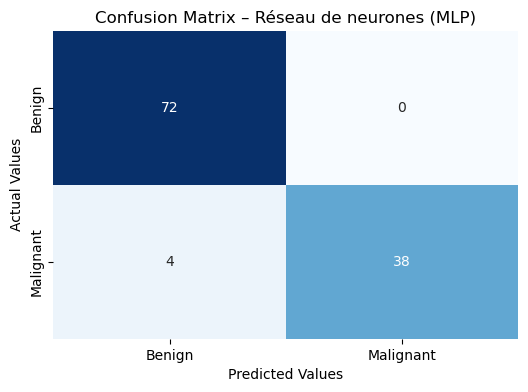

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom labels
labels = ['Benign', 'Malignant']

# Visualisation matrice de confusion – MLP
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix – Réseau de neurones (MLP)")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

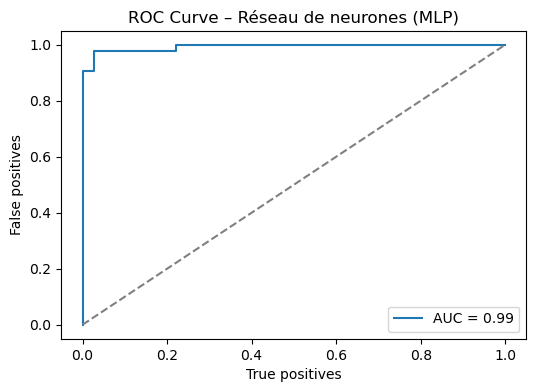

In [19]:
# Vizualisation of the ROC curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("True positives")
plt.ylabel("False positives")
plt.title("ROC Curve – Réseau de neurones (MLP)")
plt.legend()
plt.show()

The neural network model achieved an accuracy of 96.49%, correctly classifying 110 out of 114 tumors. According to the confusion matrix, all 72 benign tumors were correctly identified, while 38 out of 42 malignant tumors were also correctly classified. The model made four errors, all of which were false negatives meaning malignant tumors incorrectly predicted as benign. This type of error is especially important in a medical context, as it could delay diagnosis and treatment. Despite that, the model shows strong overall performance, with high precision and recall across both classes. It’s well-suited for use as a screening tool to support clinical decisions, helping flag potential cancer cases for further review.

**Comparison with baseline model**
Compared to the baseline logistic regression model, the MLP didn’t actually outperform it in the areas that matter most for this problem. The logistic regression model had fewer false negatives (2 vs. 4), which is critical in a medical context where missing a malignant tumor is riskier than flagging a benign one. It also had slightly higher recall for the malignant class (0.95 vs. 0.90), meaning it was better at catching true cancer cases.

The MLP did achieve perfect precision for malignant tumors, meaning every tumor it flagged as malignant was correct. But that came at the cost of missing more actual cancer cases. So while the neural network is more flexible and capable of modeling complex relationships, in this case, the simpler logistic regression model was more effective at minimizing the most dangerous type of error.

This comparison highlights an important point: more complex models aren’t always better. Sometimes, a well-tuned baseline model can be more reliable, especially when interpretability and clinical safety are priorities.

## Modeling Strategy
After evaluating both logistic regression and a neural network, we decided to test a Random Forest model. The goal was to see whether an ensemble method could improve performance, especially in reducing false negatives. The next section presents the setup and results of the Random Forest classifier.

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Results")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

Random Forest Results
Accuracy: 0.9737
Confusion matrix:
 [[72  0]
 [ 3 39]]
Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



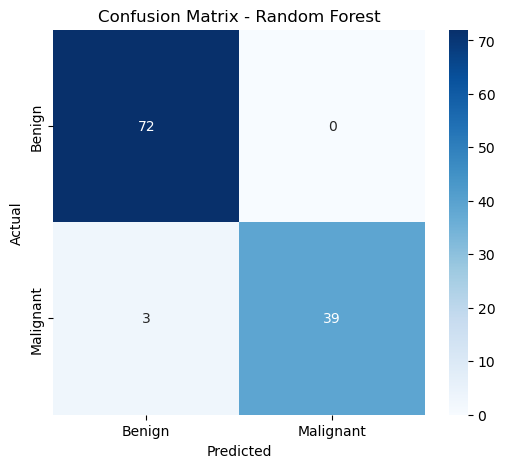

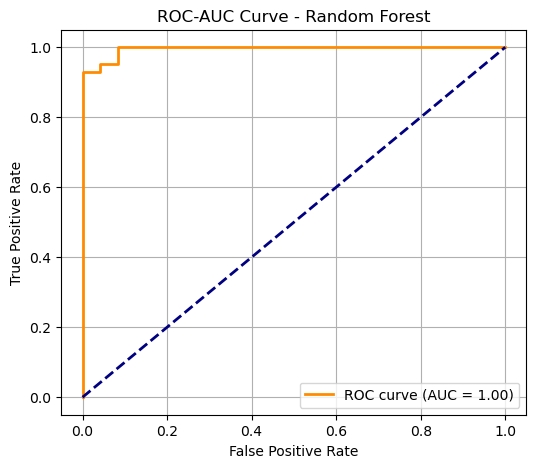

In [21]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# ROC-AUC curve
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve - Random Forest')
plt.legend(loc='lower right')
plt.grid(True)

The Random Forest model performed well, achieving an accuracy of 97.37% and correctly identifying all benign tumors. It also reached perfect precision for malignant cases, meaning every tumor it flagged as malignant was indeed malignant. However, it missed three malignant tumors, resulting in a slightly lower recall (0.93) compared to logistic regression. When we compare across models, logistic regression had fewer false negatives (only two) and a higher recall for malignant cases (0.95), which is especially important in a medical context where missing a cancer diagnosis carries serious risk. The neural network, while flexible, had the highest number of false negatives and did not outperform the simpler models.

### Conclusion
Based on these results, we’ll keep logistic regression as our final model and explore tuning its regularization parameters to see if we can push performance even further without sacrificing interpretability.